In [22]:
!pip3 install scikit-learn

In [23]:
!pip3 install catboost

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR 
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor


In [25]:
df=pd.read_csv('data/stud.csv')

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [28]:
print("Categories in gender variable", end=  " ")
print(df['gender'].unique())

print("Categories in race_ethinicity variable", end= " ")
print(df['race_ethnicity'].unique())

print("Categories in parental_level_of_education variable ", end= " ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch variable", end = " ")
print(df['lunch'].unique())

print("Categories in test_preparation_course", end=" ")
print(df['test_preparation_course'].unique())

Categories in gender variable ['female' 'male']
Categories in race_ethinicity variable ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable ['standard' 'free/reduced']
Categories in test_preparation_course ['none' 'completed']


In [29]:
## Create column transformer with three types of transformers 
# Column transformer is responsible for transforming your columns or data points
numeric_features=X.select_dtypes(exclude='object').columns
categorical_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
ohe_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",ohe_transformer,categorical_features),
        ("StandardScaler",numeric_transformer,numeric_features)
    ]
)

In [30]:
X=preprocessor.fit_transform(X)

In [31]:
X.shape

(1000, 19)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

## Create evaluate function to give all metrics after model training 

In [33]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    score=r2_score(true,predicted)
    rmse=np.sqrt(mse)
    return mae,mse,score,rmse

In [37]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "SVR":SVR()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for training data")
    print("-Mean Squared Error {:.4f}".format(model_train_mse))
    print("-Mean Absolute Error {:.4f}".format(model_train_mae))
    print("-Root Mean Squared Error {:.4f}".format(model_train_rmse))
    print("-R2_score {:.4f}".format(model_train_r2))
    
    print("---------------------------------------------------")
    print("Model PErformance for test data")
    print("-Mean Squared Error {:.4f}".format(model_test_mse))
    print("-Mean Absolute Error {:.4f}".format(model_test_mae))
    print("-Root Mean Squared Error {:.4f}".format(model_test_rmse))
    print("-R2_score {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    
    
    

LinearRegression
Model Performance for training data
-Mean Squared Error 28.3487
-Mean Absolute Error 4.2671
-Root Mean Squared Error 0.8743
-R2_score 5.3244
---------------------------------------------------
Model PErformance for test data
-Mean Squared Error 29.1167
-Mean Absolute Error 4.2158
-Root Mean Squared Error 0.8803
-R2_score 5.3960


Ridge
Model Performance for training data
-Mean Squared Error 28.3378
-Mean Absolute Error 4.2650
-Root Mean Squared Error 0.8743
-R2_score 5.3233
---------------------------------------------------
Model PErformance for test data
-Mean Squared Error 29.0563
-Mean Absolute Error 4.2111
-Root Mean Squared Error 0.8806
-R2_score 5.3904


Lasso
Model Performance for training data
-Mean Squared Error 43.4784
-Mean Absolute Error 5.2063
-Root Mean Squared Error 0.8071
-R2_score 6.5938
---------------------------------------------------
Model PErformance for test data
-Mean Squared Error 42.5064
-Mean Absolute Error 5.1579
-Root Mean Squared Error 0

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Optional: Define evaluation function if not already done
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Lists to store results
model_list = []
r2_list = []

# Iterate through models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    # Output results
    print(f"{name}")
    print("Model performance for Training set")
    print(f"- Root Mean Squared Error: {train_rmse:.4f}")
    print(f"- Mean Absolute Error: {train_mae:.4f}")
    print(f"- R2 Score: {train_r2:.4f}")
    print("----------------------------------")
    print("Model performance for Test set")
    print(f"- Root Mean Squared Error: {test_rmse:.4f}")
    print(f"- Mean Absolute Error: {test_mae:.4f}")
    print(f"- R2 Score: {test_r2:.4f}")
    print("=" * 35 + "\n")

    # Append to lists
    model_list.append(name)
    r2_list.append(test_r2)


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3244
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803

Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253

Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
--------------------------

## Results 

In [39]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=['R2_score'], ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.853334
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.850495
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.745046


## Linear Regression

In [42]:
linear_model=LinearRegression(fit_intercept=True)
linear_model=linear_model.fit(X_train,y_train)
y_pred=linear_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f " %score)

Accuracy of the model is 88.03 


## PLot y_test and y_pred

Text(0, 0.5, 'Predicted')

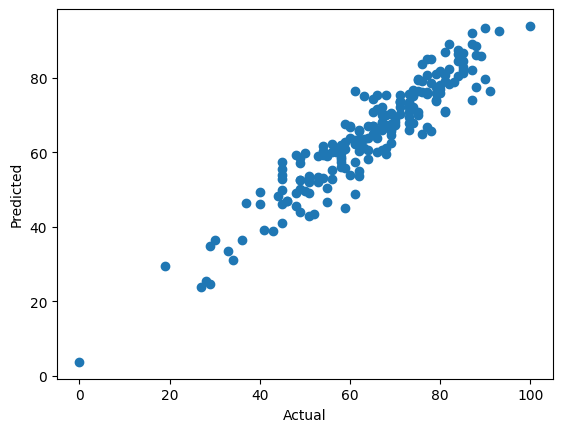

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

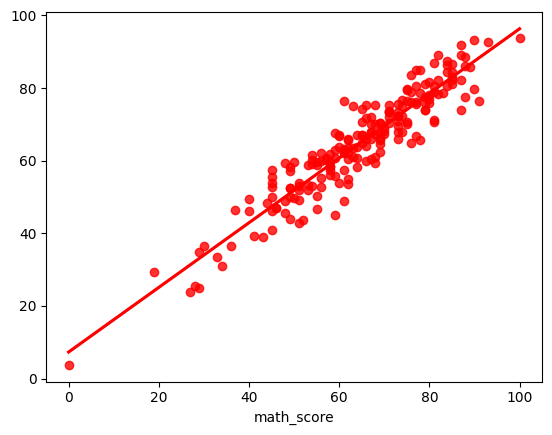

In [44]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

## Difference between actual and predicted values 

In [45]:
pred_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
